# Plot RXE comparisons

In [1]:
library(ggpubr)
library(tidyverse)

Loading required package: ggplot2

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.2     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
save_ggplots <- function(p, fn, w=7, h=7){
    for(ext in c('.svg', '.png', '.pdf')){
        ggsave(p, filename=paste0(fn, ext), width=w, height=h)
    }
}

In [3]:
df = data.table::fread("../../_m/RXE_public.csv") %>% 
    mutate_if(is.character, as.factor)
levels(df$Sex) <- c("Female", "Male")
levels(df$Dx) <- c("CTL", "SZ")
levels(df$Region) <- c("Caudate", "DLPFC", "Hippocampus")
df %>% head(2)

V1,X,autosome,sample,RXE,Sex,Dx,Region
<fct>,<dbl>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>
R12864,3.076746,2.791519,R12864,0.2852265,Female,SZ,Caudate
R12865,3.201302,2.986970,R12865,0.2143323,Male,SZ,Caudate


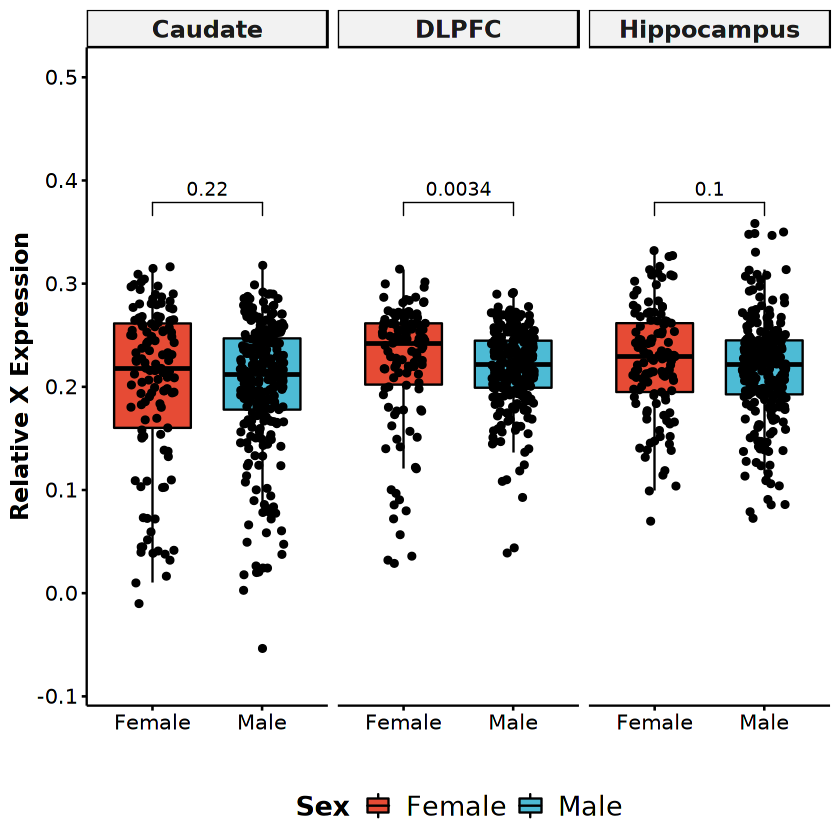

In [4]:
bxp = df %>% 
    ggboxplot(x="Sex", y="RXE", fill='Sex', xlab='', palette="npg",
              add='jitter', outlier.shape=NA, facet.by='Region',
              ylab='Relative X Expression', ylim=c(-0.08, 0.5),
              panel.labs.font=list(face='bold', size=14), 
              legend="bottom", ggtheme=theme_pubr()) + 
    stat_compare_means(comparisons=list(c("Female", "Male")))+
    font("xy.title", size=14, face="bold") + 
    font("xy.text", size=12) + #rremove("y.ticks") +
    font("legend.title", size=16, face="bold") + 
    font("legend.text", size=16)
save_ggplots(bxp, "rxe_sex_byRegion", 7, 5)
bxp

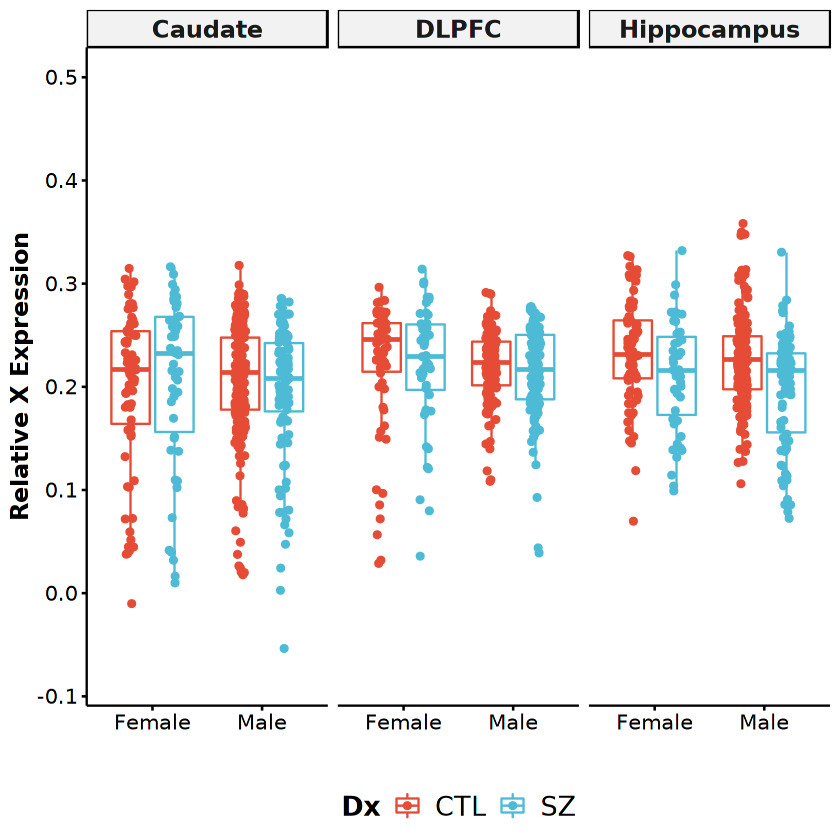

In [5]:
bxp = df %>% 
    ggboxplot(x="Sex", y="RXE", color='Dx', xlab='', palette="npg",
              add='jitter', outlier.shape=NA, facet.by='Region',
              ylab='Relative X Expression', ylim=c(-0.08, 0.5),
              panel.labs.font=list(face='bold', size=14), 
              legend="bottom", ggtheme=theme_pubr()) + 
    font("xy.title", size=14, face="bold") + 
    font("xy.text", size=12) + #rremove("y.ticks") +
    font("legend.title", size=16, face="bold") + 
    font("legend.text", size=16)
save_ggplots(bxp, "rxe_sex_diagnosis_byRegion", 7, 5)
bxp

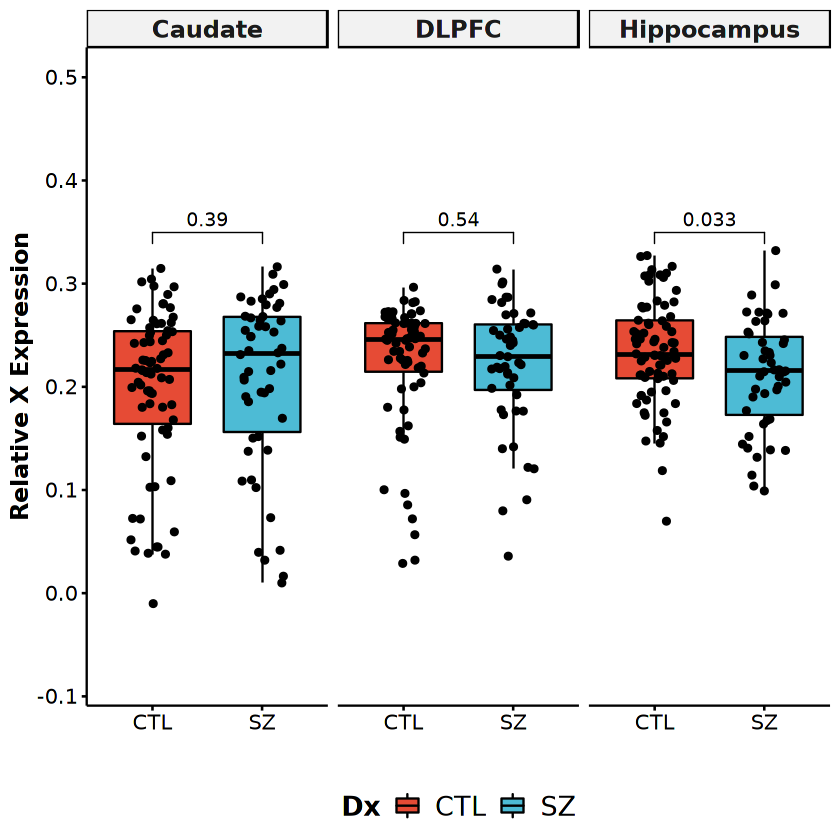

In [6]:
bxp_f = df %>% filter(Sex=='Female') %>%
    ggboxplot(x="Dx", y="RXE", fill='Dx', xlab='', palette="npg",
              add='jitter', outlier.shape=NA, facet.by=c('Region'),
              ylab='Relative X Expression', ylim=c(-0.08, 0.5),
              panel.labs.font=list(face='bold', size=14), 
              legend="bottom", ggtheme=theme_pubr()) + 
    stat_compare_means(comparisons=list(c("CTL", "SZ")))+
    font("xy.title", size=14, face="bold") + 
    font("xy.text", size=12) + #rremove("y.ticks") +
    font("legend.title", size=16, face="bold") + 
    font("legend.text", size=16)
save_ggplots(bxp_f, "rxe_female_diagnosis_byRegion", 7, 5)
bxp_f

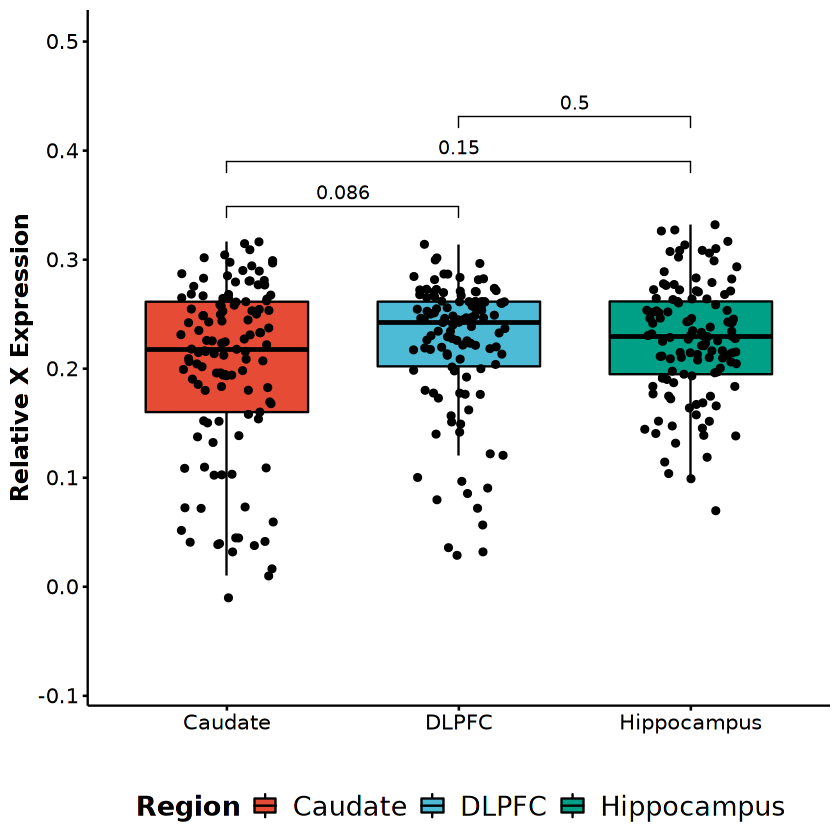

In [7]:
bxp_f2 = df %>% filter(Sex=='Female') %>%
    ggboxplot(x="Region", y="RXE", fill='Region', xlab='', palette="npg",
              add='jitter', outlier.shape=NA, 
              ylab='Relative X Expression', ylim=c(-0.08, 0.5),
              panel.labs.font=list(face='bold', size=14), 
              legend="bottom", ggtheme=theme_pubr()) + 
    stat_compare_means(comparisons=list(c("Caudate", "DLPFC"), 
                                        c("Caudate", "Hippocampus"), 
                                        c("DLPFC", "Hippocampus")))+
    font("xy.title", size=14, face="bold") + 
    font("xy.text", size=12) + #rremove("y.ticks") +
    font("legend.title", size=16, face="bold") + 
    font("legend.text", size=16)
save_ggplots(bxp_f2, "rxe_female_region", 6, 6)
bxp_f2

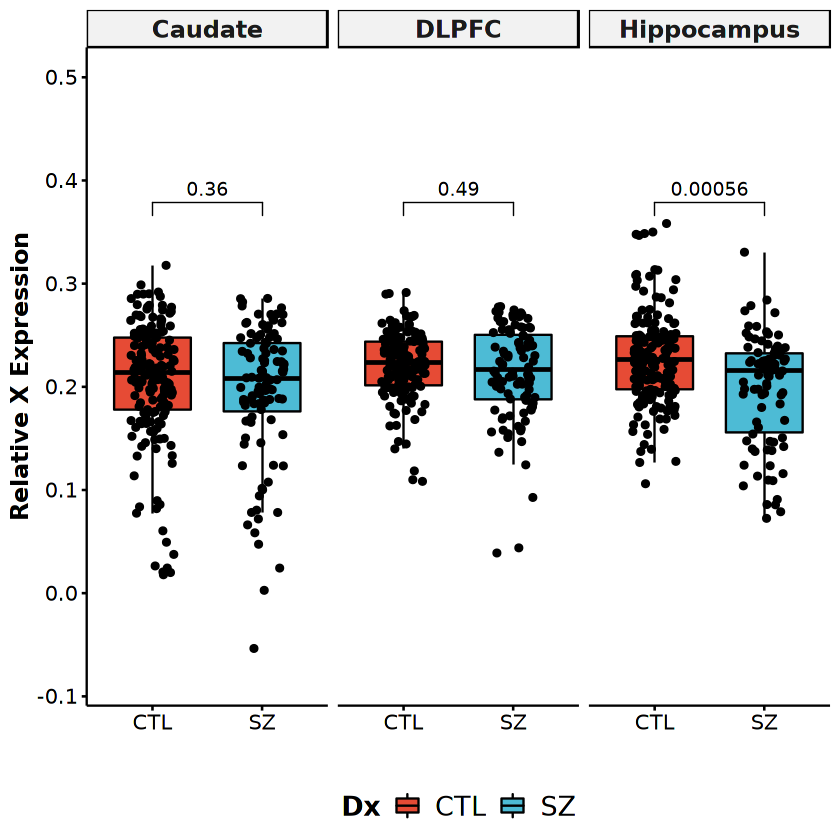

In [8]:
bxp_m = df %>% filter(Sex=='Male') %>%
    ggboxplot(x="Dx", y="RXE", fill='Dx', xlab='', palette="npg",
              add='jitter', outlier.shape=NA, facet.by=c('Region'),
              ylab='Relative X Expression', ylim=c(-0.08, 0.5),
              panel.labs.font=list(face='bold', size=14), 
              legend="bottom", ggtheme=theme_pubr()) + 
    stat_compare_means(comparisons=list(c("CTL", "SZ")))+
    font("xy.title", size=14, face="bold") + 
    font("xy.text", size=12) + #rremove("y.ticks") +
    font("legend.title", size=16, face="bold") + 
    font("legend.text", size=16)
save_ggplots(bxp_m, "rxe_male_diagnosis_byRegion", 7, 5)
bxp_m

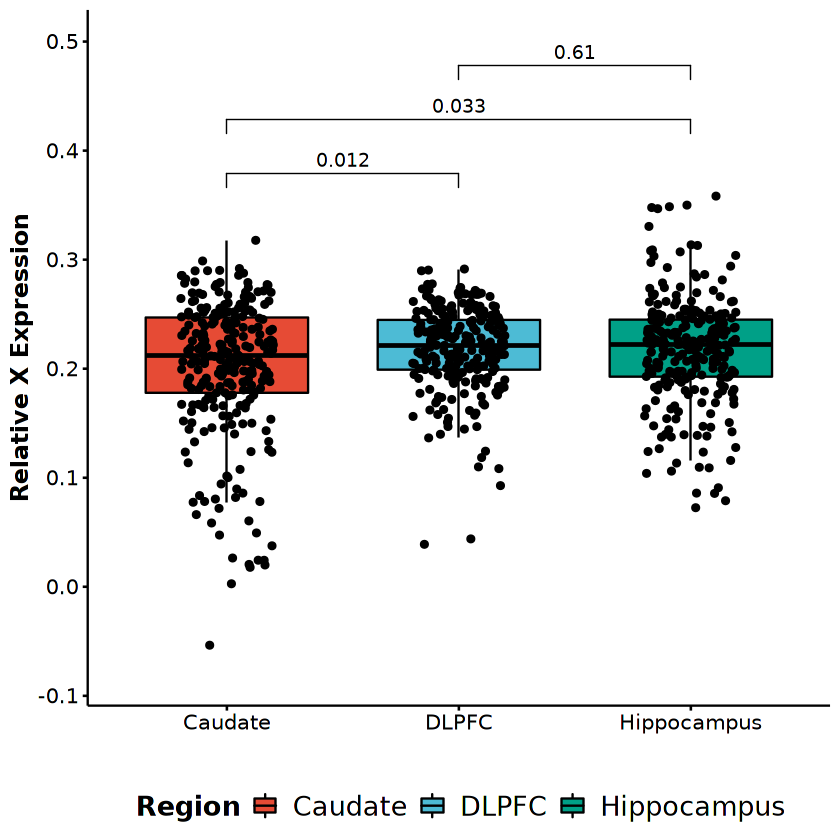

In [9]:
bxp_m2 = df %>% filter(Sex=='Male') %>%
    ggboxplot(x="Region", y="RXE", fill='Region', xlab='', palette="npg",
              add='jitter', outlier.shape=NA, 
              ylab='Relative X Expression', ylim=c(-0.08, 0.5),
              panel.labs.font=list(face='bold', size=14), 
              legend="bottom", ggtheme=theme_pubr()) + 
    stat_compare_means(comparisons=list(c("Caudate", "DLPFC"), 
                                        c("Caudate", "Hippocampus"), 
                                        c("DLPFC", "Hippocampus")))+
    font("xy.title", size=14, face="bold") + 
    font("xy.text", size=12) + #rremove("y.ticks") +
    font("legend.title", size=16, face="bold") + 
    font("legend.text", size=16)
save_ggplots(bxp_m2, "rxe_male_region", 6, 6)
bxp_m2

## Repreducibility Information

In [10]:
Sys.time()
proc.time()
options(width = 120)
sessioninfo::session_info()

[1] "2021-07-10 10:08:07 EDT"

   user  system elapsed 
 15.412   0.419  16.264 

─ Session info ───────────────────────────────────────────────────────────────────────────────────────────────────────
 setting  value                       
 version  R version 4.0.3 (2020-10-10)
 os       Arch Linux                  
 system   x86_64, linux-gnu           
 ui       X11                         
 language (EN)                        
 collate  en_US.UTF-8                 
 ctype    en_US.UTF-8                 
 tz       America/New_York            
 date     2021-07-10                  

─ Packages ───────────────────────────────────────────────────────────────────────────────────────────────────────────
 package     * version  date       lib source        
 abind         1.4-5    2016-07-21 [1] CRAN (R 4.0.2)
 assertthat    0.2.1    2019-03-21 [1] CRAN (R 4.0.2)
 backports     1.2.1    2020-12-09 [1] CRAN (R 4.0.2)
 base64enc     0.1-3    2015-07-28 [1] CRAN (R 4.0.2)
 broom         0.7.8    2021-06-24 [1] CRAN (R 4.0.3)
 Cairo         1.5-12.2 2020-07-07 [1] CRAN (R 